In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
os.chdir(r"/Users/kitchaichawmengchai/Downloads/VScode/Customer-Analytic/")



In [27]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
retail= pd.read_csv('data/retail_clean.csv')
retail

,Unnamed: 0,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue
0,0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...,...
779490,1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
779491,1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
779492,1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
779493,1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85


In [7]:
retail['InvoiceDate']= pd.to_datetime(retail['InvoiceDate'])
retail['date']= retail['InvoiceDate'].dt.strftime('%Y-%m-%d')
retail['date']= pd.to_datetime(retail['date'])

In [8]:
max_date= retail['date'].max()

In [10]:
retail.columns

Index(['Unnamed: 0', 'Invoice', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'Price', 'Customer ID', 'Country', 'Revenue', 'date'],
      dtype='object')

# Recency

In [11]:
customers_recency= retail.groupby('Customer ID').agg(last_date= ('date','max')).reset_index()
customers_recency['recency']= max_date- customers_recency['last_date']
customers_recency['recency']=customers_recency['recency'].astype('string').str.replace('days','').astype(int)

In [12]:
customers_recency['recency']

0       325
1         2
2        75
3        18
4       310
       ... 
5876      3
5877    431
5878    660
5879    476
5880     42
Name: recency, Length: 5881, dtype: int64

# Frequency

In [13]:
#### frequency
freq2= retail.groupby('Customer ID').date.count().reset_index()
freq2.columns= ['Customer ID','frequency']
freq2

,Customer ID,frequency
0,12346.0,34
1,12347.0,222
2,12348.0,51
3,12349.0,175
4,12350.0,17
...,...,...
5876,18283.0,938
5877,18284.0,28
5878,18285.0,12
5879,18286.0,67


# Monetary

In [14]:
monet1= retail.groupby(['Customer ID','Invoice']).agg(revenue= ('Revenue','sum')).reset_index()
monet2= monet1.groupby('Customer ID').agg(monetary= ('revenue','mean')).reset_index()

# Ranking

In [15]:
customers_recency['rank_recency']= customers_recency['recency'].rank(pct=True)
freq2['freq_ranking']=freq2['frequency'].rank(ascending=False,pct=True)
monet2['rank_monet']= monet2['monetary'].rank(ascending=False,pct=True)

In [17]:
all_data= pd.merge(customers_recency, freq2,how='left',on='Customer ID')
all_data= pd.merge(all_data,monet2,how='left',on='Customer ID')

In [20]:
all_data

,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet
0,12346.0,2011-01-18,325,0.710338,34,0.621068,6463.038333,0.001530
1,12347.0,2011-12-07,2,0.031202,222,0.153715,615.191250,0.106104
2,12348.0,2011-09-25,75,0.458085,51,0.505951,403.880000,0.263051
3,12349.0,2011-11-21,18,0.192229,175,0.197585,1107.172500,0.028567
4,12350.0,2011-02-02,310,0.699286,17,0.790342,334.400000,0.375446
...,...,...,...,...,...,...,...,...
5876,18283.0,2011-12-06,3,0.046846,938,0.014708,121.131818,0.892365
5877,18284.0,2010-10-04,431,0.831406,28,0.674545,461.680000,0.199456
5878,18285.0,2010-02-17,660,0.967267,12,0.851301,427.000000,0.235504
5879,18286.0,2010-08-20,476,0.868730,67,0.430539,648.215000,0.095732


In [35]:
bins=[0,0.5,1]
names= ['1','0']

In [36]:
final= pd.DataFrame(customers_recency['Customer ID'])
final['frequency']= pd.cut(freq2['freq_ranking'],bins,labels=names).astype('string')
final['recency']= pd.cut(customers_recency['rank_recency'],bins,labels=names).astype('string')
final['monetary']=pd.cut(monet2['rank_monet'],bins,labels=names).astype('string')


In [37]:
final

,Customer ID,frequency,recency,monetary
0,12346.0,0,0,1
1,12347.0,1,1,1
2,12348.0,0,1,1
3,12349.0,1,1,1
4,12350.0,0,0,1
...,...,...,...,...
5876,18283.0,1,1,0
5877,18284.0,0,0,1
5878,18285.0,0,0,1
5879,18286.0,1,0,1


In [38]:
final['rec_freq_mone']=final['recency']+final['frequency']+final['monetary']


In [39]:
final

,Customer ID,frequency,recency,monetary,rec_freq_mone
0,12346.0,0,0,1,001
1,12347.0,1,1,1,111
2,12348.0,0,1,1,101
3,12349.0,1,1,1,111
4,12350.0,0,0,1,001
...,...,...,...,...,...
5876,18283.0,1,1,0,110
5877,18284.0,0,0,1,001
5878,18285.0,0,0,1,001
5879,18286.0,1,0,1,011


In [40]:
all_data['rec_freq_monet']= final['rec_freq_mone']
all_data.to_csv('rfm.csv')

In [42]:
all_data

,Customer ID,last_date,recency,rank_recency,frequency,freq_ranking,monetary,rank_monet,rec_freq_monet
0,12346.0,2011-01-18,325,0.710338,34,0.621068,6463.038333,0.001530,001
1,12347.0,2011-12-07,2,0.031202,222,0.153715,615.191250,0.106104,111
2,12348.0,2011-09-25,75,0.458085,51,0.505951,403.880000,0.263051,101
3,12349.0,2011-11-21,18,0.192229,175,0.197585,1107.172500,0.028567,111
4,12350.0,2011-02-02,310,0.699286,17,0.790342,334.400000,0.375446,001
...,...,...,...,...,...,...,...,...,...
5876,18283.0,2011-12-06,3,0.046846,938,0.014708,121.131818,0.892365,110
5877,18284.0,2010-10-04,431,0.831406,28,0.674545,461.680000,0.199456,001
5878,18285.0,2010-02-17,660,0.967267,12,0.851301,427.000000,0.235504,001
5879,18286.0,2010-08-20,476,0.868730,67,0.430539,648.215000,0.095732,011


/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_58939/161440139.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  fig.set_xticklabels(fig.get_xticklabels(),


[Text(0, 0, '000'),
 Text(1, 0, '001'),
 Text(2, 0, '010'),
 Text(3, 0, '011'),
 Text(4, 0, '100'),
 Text(5, 0, '101'),
 Text(6, 0, '110'),
 Text(7, 0, '111')]

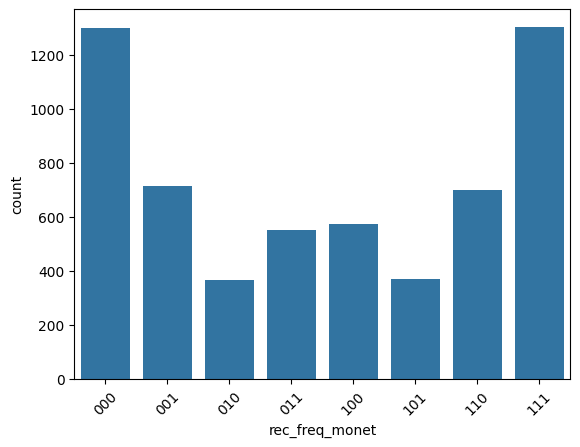

In [43]:
import seaborn as sns
fig= sns.countplot(x='rec_freq_monet',data= all_data.sort_values('rec_freq_monet'))
fig.set_xticklabels(fig.get_xticklabels(),
                   rotation=45 )

In [29]:
rfm= pd.read_csv('rfm.csv')
rfm.columns

Index(['Unnamed: 0', 'Customer ID', 'last_date', 'recency', 'rank_recency',
       'frequency', 'freq_ranking', 'monetary', 'rank_monet',
       'rec_freq_monet'],
      dtype='object')

In [31]:
X= rfm[['frequency','monetary','recency']]

In [32]:
km= KMeans(n_clusters=3,n_init= 10,max_iter=300,tol=0.0001)


/var/folders/2h/rjm2fb_j53gb0nswwgx_xyfc0000gn/T/ipykernel_58939/1494843445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['centroids']=fitting


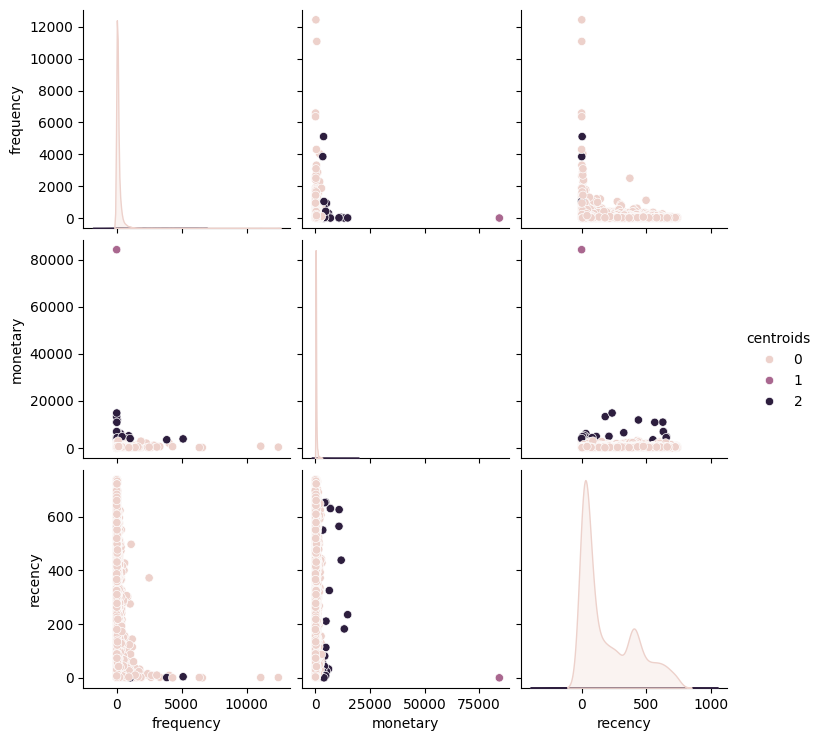

In [33]:

fitting= km.fit_predict(X)
X['centroids']=fitting
sns.pairplot(data=X,hue='centroids')


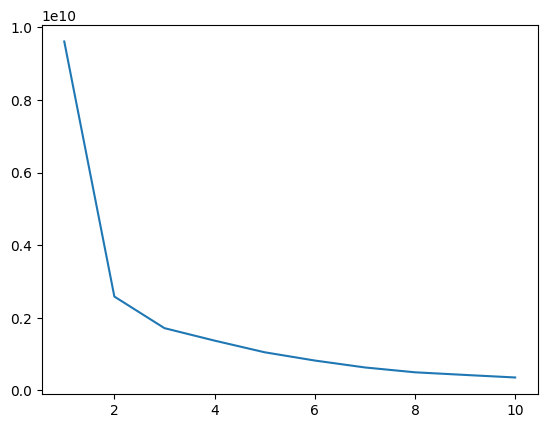

In [34]:
sse= []
for k in range(1,11):
    kmeans= KMeans(n_clusters=k,n_init= 10,max_iter=300,tol=0.0001)
    a= kmeans.fit(X)
    sse.append(a.inertia_)   
plt.plot(range(1,11),sse)
